## Importing packages

In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading the data

In [520]:
creditDataPath = "dataset/default_of_credit_card_clients.csv"
creditData = pd.read_csv(creditDataPath, header = 1, index_col = 0)

## Checking the names of the variables

In [521]:
creditData.dtypes.index

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [522]:
creditData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Data plots

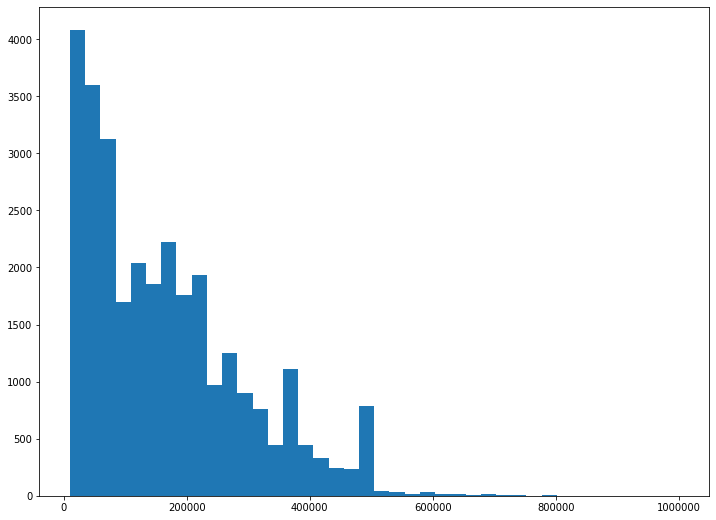

In [527]:
# Credit histogram
plt.hist(creditData['LIMIT_BAL'], bins = 40)
plt.show()

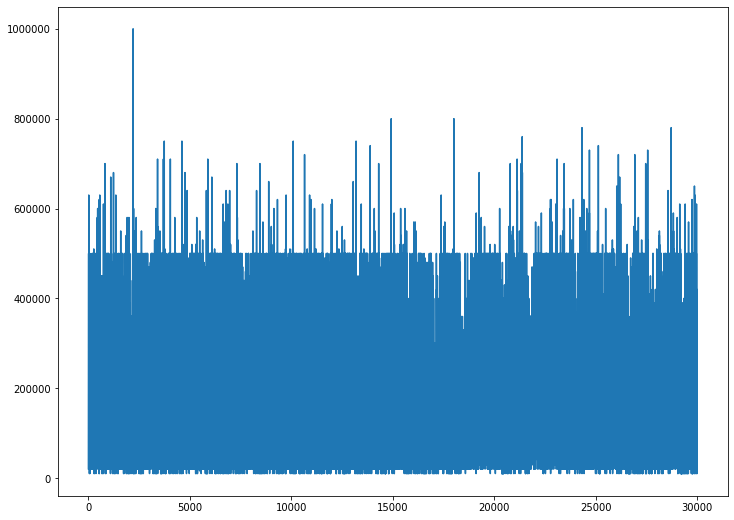

In [528]:
plt.plot(creditData['LIMIT_BAL'])
plt.show()

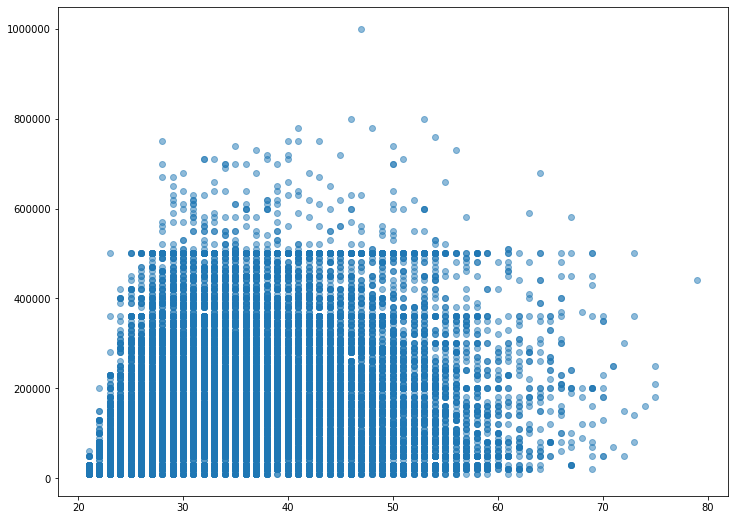

In [529]:
plt.scatter(creditData['AGE'], creditData['LIMIT_BAL'], alpha = 0.5)
plt.show()

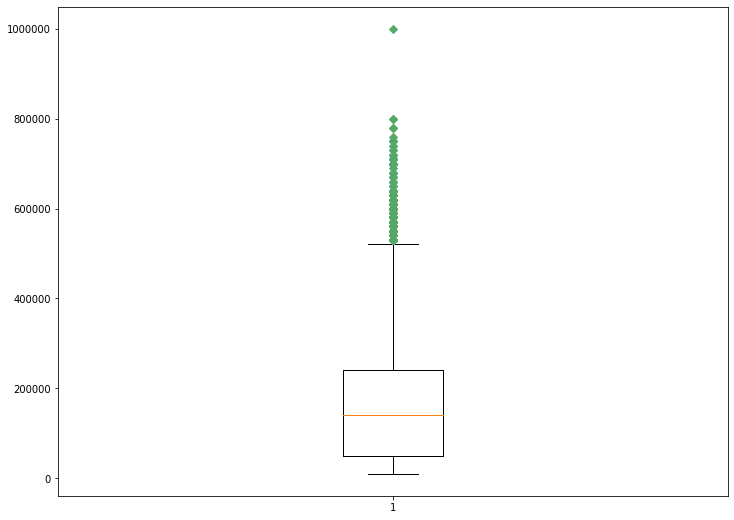

In [530]:
plt.boxplot(creditData['LIMIT_BAL'], 0, 'gD')
plt.show()

In [531]:
default = np.where(creditData['default payment next month'] == 1, 'Yes', 'No')
gender = np.where(creditData['SEX'] == 1, 'Male', 'Female')

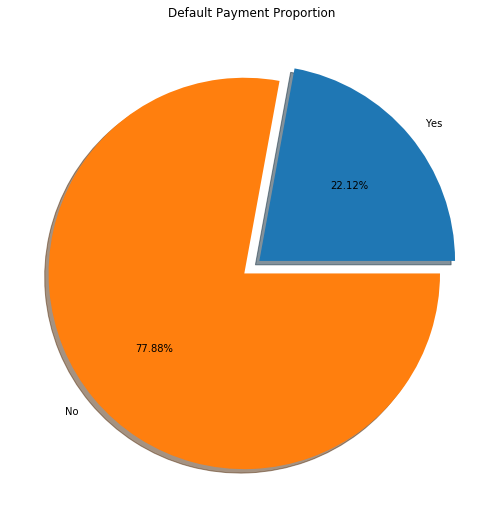

In [532]:
# default = pd.DataFrame({'ID' : list(range(0,len(default))), 'Default Payment' : default})
# sns.catplot(data = default, x = 'Default Payment', kind = 'count')

yesCount = sum(default == 'Yes')
noCount = sum(default == 'No')
yesNoSizes = [yesCount, noCount]

plt.pie(yesNoSizes, explode = [0.05, 0.05], autopct = '%1.2f%%', labels = ['Yes', 'No'], shadow = True)
plt.title("Default Payment Proportion")
plt.show()

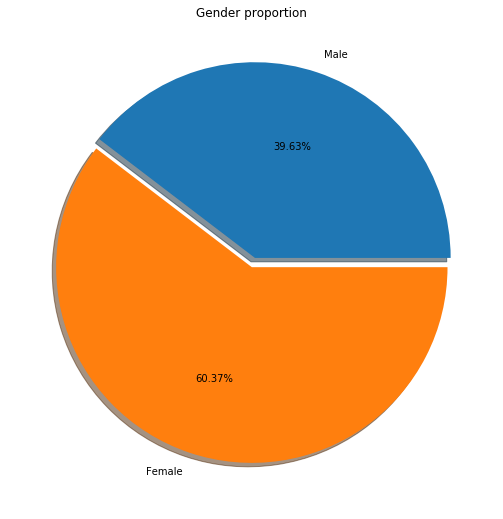

In [533]:
maleCount = sum(gender == 'Male')
femaleCount = sum(gender == 'Female')
pieSizes = (maleCount, femaleCount)

# Customer gender pie chart
plt.pie(pieSizes, explode = (0.05, 0), autopct='%1.2f%%', labels = ('Male', 'Female'), shadow = True)
plt.title("Gender proportion")
plt.show()

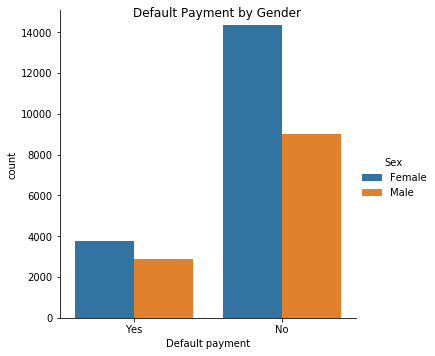

In [534]:
defPayGender = pd.DataFrame({"Sex" : gender, "Default payment" : default})

# Default payment by gender
defPayGenderPlot = sns.catplot(data = defPayGender, x = 'Default payment', kind = 'count', hue = 'Sex')
defPayGenderPlot.fig.suptitle("Default Payment by Gender")
plt.show()

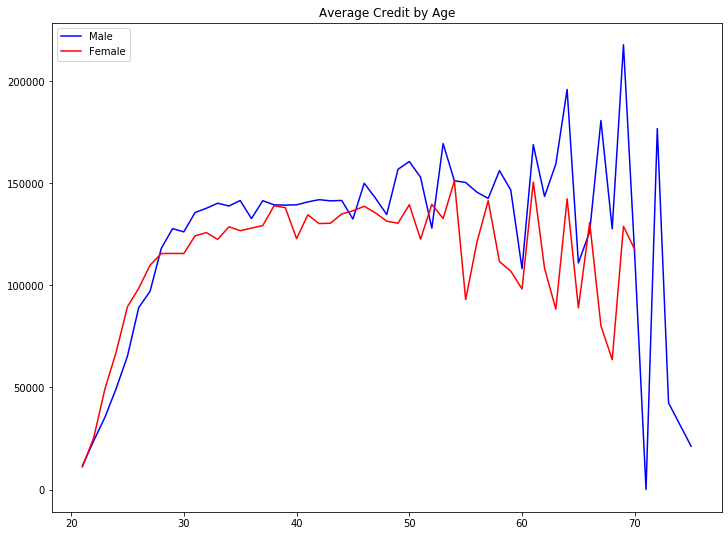

In [535]:
creditDataMale = creditData[gender == 'Male']
creditDataFemale = creditData[gender == 'Female']
meanLimBalMale = creditDataMale[['AGE', 'LIMIT_BAL']].groupby('AGE').aggregate(['mean', 'std', 'count'])
meanLimBalFemale = creditDataFemale[['AGE', 'LIMIT_BAL']].groupby('AGE').aggregate(['mean', 'std', 'count'])

plt.plot(meanLimBalMale.index, meanLimBalMale[('LIMIT_BAL', 'std')], color = 'blue', label = 'Male')
plt.plot(meanLimBalFemale.index, meanLimBalFemale[('LIMIT_BAL', 'std')], color = 'red', label = 'Female')
plt.legend(loc='upper left')
plt.title("Average Credit by Age")
plt.show()

In [536]:
print(meanLimBalMale, meanLimBalFemale)

         LIMIT_BAL                     
              mean            std count
AGE                                    
21    19523.809524   11608.699529    21
22    32158.273381   23827.964023   139
23    40923.076923   35400.546510   260
24    49915.492958   49503.109096   355
25    73923.076923   65370.167884   390
26   108922.413793   89121.718971   464
27   125103.969754   97020.179892   529
28   153636.363636  118108.098589   506
29   171701.782820  127753.523905   617
30   174955.436720  126194.463640   561
31   187888.198758  135660.715751   483
32   196491.596639  137732.318314   476
33   190497.737557  140206.282249   442
34   196737.288136  138865.401111   472
35   191123.853211  141524.940428   436
36   175241.379310  132681.053200   435
37   195172.413793  141430.008002   435
38   182759.433962  139425.293402   424
39   202817.955112  139263.380961   401
40   185236.768802  139437.766446   359
41   184334.277620  140840.300389   353
42   186679.878419  141951.008673   329


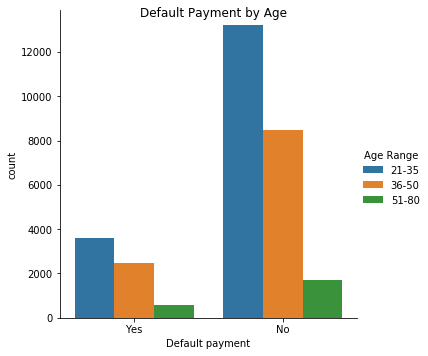

In [537]:
age = creditData['AGE']
ageConditions = [age <= 35, (age > 35) & (age <= 50), age > 50]
ageOptions = ['21-35', '36-50', '51-80']
ageRange = np.select(ageConditions, ageOptions, default = '--')

defPayAge = pd.DataFrame({"Age Range" : ageRange, "Default payment" : default})

# Default payment by age range
defPayAgePlot = sns.catplot(data = defPayAge, x = "Default payment", kind = "count", hue = "Age Range")
defPayAgePlot.fig.suptitle("Default Payment by Age")
plt.show()

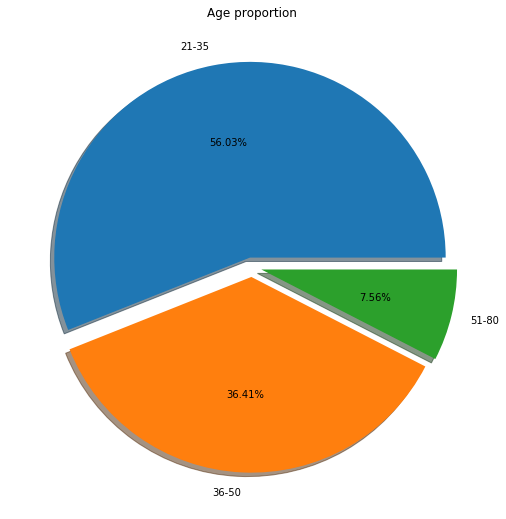

In [538]:
ageSizes = []
for ageRan in ageOptions :
    ageSizes.append( sum(defPayAge['Age Range'] == ageRan) )

plt.pie(ageSizes, explode = (0.05, 0.05, 0.05), autopct='%1.2f%%', labels = ageOptions, shadow = True)
plt.title("Age proportion")
plt.show()

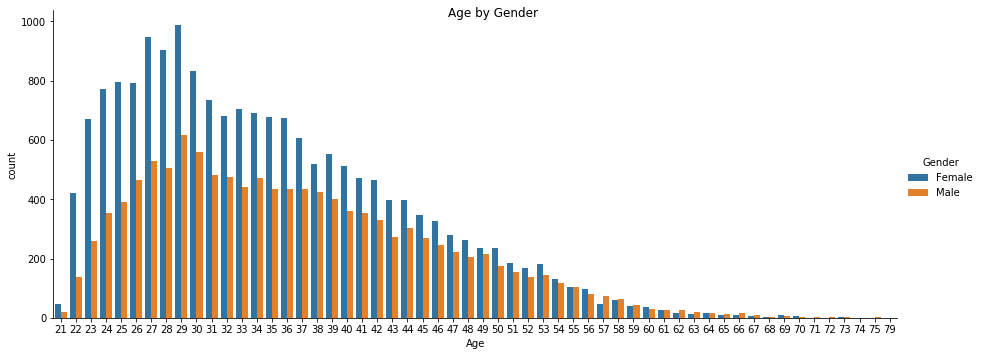

In [539]:
ageGender = pd.DataFrame({"Gender" : gender, "Age" : creditData["AGE"]})

# Customer's age by gender
ageGenderPlot = sns.catplot(data = ageGender, x = "Age", kind = "count", hue = "Gender", aspect = 20/8)
ageGenderPlot.fig.suptitle("Age by Gender")
plt.show()

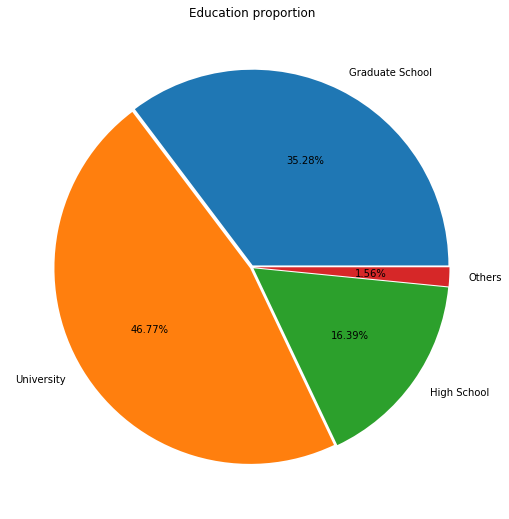

In [540]:
education = creditData['EDUCATION']
eduConditions = [education == 1, education == 2, education == 3, education >= 4]
eduOptions = ['Graduate School', 'University', 'High School', 'Others']

educationLabels = np.select(eduConditions, eduOptions, default = 'Others')

eduSizes = []
for eduOp in eduOptions:
    eduSizes.append( sum(educationLabels == eduOp) )

plt.pie(eduSizes, explode = (0.01, 0.01, 0.01, 0.01), labels = eduOptions, autopct = '%1.2f%%')
plt.title("Education proportion")
plt.show()

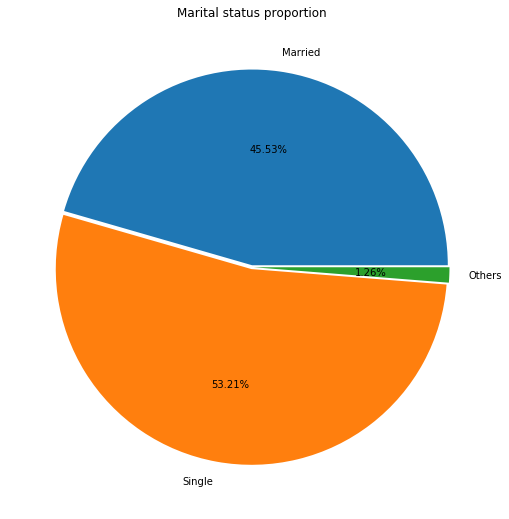

In [541]:
marrige = creditData['MARRIAGE']
marrigeConditions = [marrige == 1, marrige == 2, marrige == 3]
marrigeOptions = ['Married', 'Single', 'Others']

marrigeLabels = np.select(marrigeConditions, marrigeOptions, default = 'Others')

marrigeSizes = []
for marrigeOp in marrigeOptions:
    marrigeSizes.append( sum(marrigeLabels == marrigeOp) )

plt.pie(marrigeSizes, explode = (0.01, 0.01, 0.01), labels = marrigeOptions, autopct = '%1.2f%%')
plt.title("Marital status proportion")
plt.show()

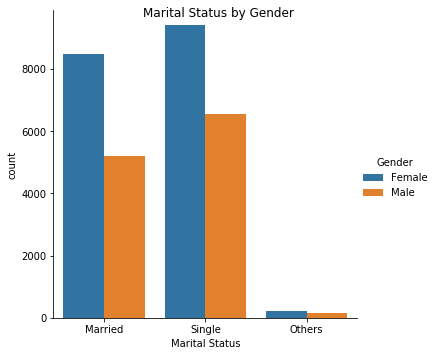

In [543]:
marriageGender = pd.DataFrame({'Marital Status' : marrigeLabels, 'Gender' : gender})
marriageGenderPlot = sns.catplot(data = marriageGender, x = 'Marital Status', kind = 'count', hue = 'Gender')
marriageGenderPlot.fig.suptitle("Marital Status by Gender")
plt.show()

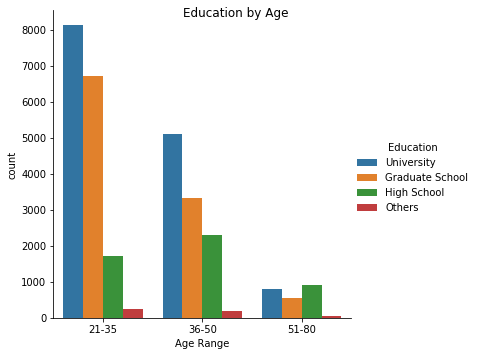

In [545]:
ageEdu = pd.DataFrame({'Age Range' : ageRange, 'Education' : educationLabels})

ageEduPlot = sns.catplot(data = ageEdu, x = 'Age Range', kind = 'count', hue = 'Education')
ageEduPlot.fig.suptitle("Education by Age")
plt.show()

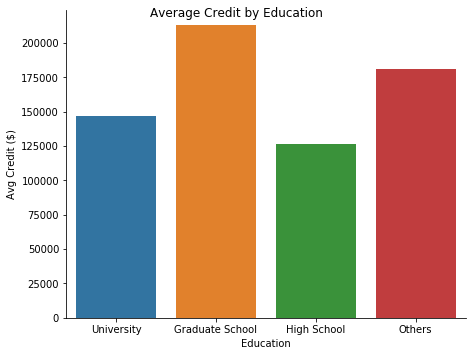

In [546]:
limitEdu = pd.DataFrame({'Credit' : creditData['LIMIT_BAL'], 'Education' : educationLabels})
limitEduSumm = limitEdu.groupby('Education').aggregate(['mean', 'median', 'std', 'count']).reset_index()

limitEduSumm['OrderCol'] = [2, 3, 4, 1]
limitEduSumm.sort_values('OrderCol', inplace = True)

limitEduSummPlot = sns.catplot(data = limitEduSumm, x = 'Education', y = ('Credit', 'mean'), kind = 'bar', aspect = 4/3)
limitEduSummPlot.fig.suptitle("Average Credit by Education")
limitEduSummPlot.set(ylabel = 'Avg Credit ($)')
plt.show()

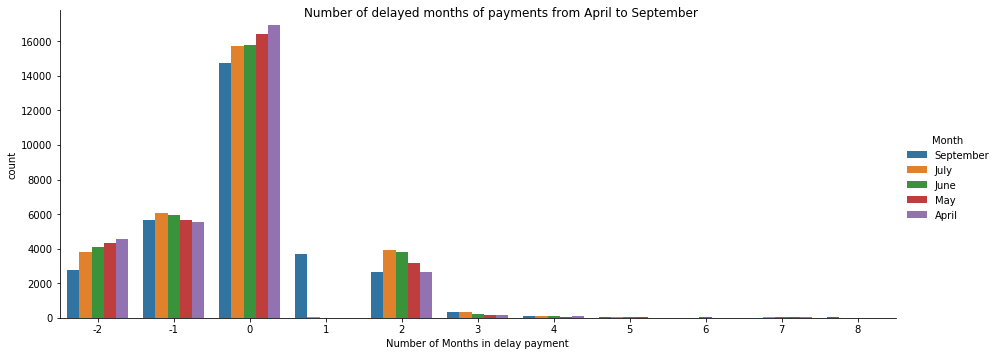

Number of Months in delay payment,-2,-1,0,1,2,3,4,5,6,7,8
Month,,,,,,,,,,,
April,4546.0,5539.0,16947.0,NaN,2626.0,178.0,84.0,17.0,4.0,58.0,1.0
July,3782.0,6050.0,15730.0,28.0,3927.0,326.0,99.0,25.0,12.0,20.0,1.0
June,4085.0,5938.0,15764.0,4.0,3819.0,240.0,76.0,21.0,23.0,27.0,3.0
May,4348.0,5687.0,16455.0,2.0,3159.0,180.0,69.0,35.0,5.0,58.0,2.0
September,2759.0,5686.0,14737.0,3688.0,2667.0,322.0,76.0,26.0,11.0,9.0,19.0


In [547]:
payDelayData = creditData.loc[:, 'PAY_0':'PAY_5']
payDelayData = payDelayData.melt(value_vars = payDelayData.columns, var_name = 'Month', value_name = 'Number of Months in delay payment')
month = payDelayData['Month']
monthConditions = [month == 'PAY_0', month == 'PAY_1', month == 'PAY_2', month == 'PAY_3', month == 'PAY_4', month == 'PAY_5']
monthOptions = ['September', 'August', 'July', 'June', 'May', 'April']

month = np.select(monthConditions, monthOptions, default = '--')
payDelayData['Month'] = month

payDelayPlot = sns.catplot(data = payDelayData, x = 'Number of Months in delay payment', kind = 'count', hue = 'Month', aspect = 20/8)
payDelayPlot.fig.suptitle("Number of delayed months of payments from April to September")
plt.show()

payDelayData.groupby('Month')['Number of Months in delay payment'].value_counts().unstack()

In [548]:
def pairwiseCorr(corrMatrix):
    attr1 = []
    attr2 = []
    value = []
    for rowName, _ in corrMatrix.iterrows():
        for colName, _ in corrMatrix.iteritems():
            if rowName == colName:
                break
            else:
                attr1.append(rowName)
                attr2.append(colName)
                value.append(corrMatrix.loc[rowName, colName])
    pwCorr = pd.DataFrame({'Attribute_1' : attr1, 'Attribute_2' : attr2, 'Value' : value})
    pwCorr = pwCorr.sort_values('Value', ascending = False)
    return pwCorr

In [550]:
corrMatrix = creditData.corr()
pairWiseCorrMatrix = pairwiseCorr(corrMatrix)
attr1 = pairWiseCorrMatrix['Attribute_1']
attr2 = pairWiseCorrMatrix['Attribute_2']
pwcorrMatrixSubset = pairWiseCorrMatrix[(attr1 == 'default payment next month') & (attr2.str.contains('^BILL_AMT'))]
pwcorrMatrixSubset = pwcorrMatrixSubset.sort_values('Value')

print(pairWiseCorrMatrix)
print(pwcorrMatrixSubset.sort_values('Value'))

                    Attribute_1 Attribute_2     Value
77                    BILL_AMT2   BILL_AMT1  0.951484
135                   BILL_AMT6   BILL_AMT5  0.946197
119                   BILL_AMT5   BILL_AMT4  0.940134
90                    BILL_AMT3   BILL_AMT2  0.928326
104                   BILL_AMT4   BILL_AMT3  0.923969
134                   BILL_AMT6   BILL_AMT4  0.900941
103                   BILL_AMT4   BILL_AMT2  0.892482
89                    BILL_AMT3   BILL_AMT1  0.892279
118                   BILL_AMT5   BILL_AMT3  0.883910
102                   BILL_AMT4   BILL_AMT1  0.860272
117                   BILL_AMT5   BILL_AMT2  0.859778
133                   BILL_AMT6   BILL_AMT3  0.853320
132                   BILL_AMT6   BILL_AMT2  0.831594
116                   BILL_AMT5   BILL_AMT1  0.829779
44                        PAY_5       PAY_4  0.819835
54                        PAY_6       PAY_5  0.816900
131                   BILL_AMT6   BILL_AMT1  0.802650
35                        PA